In [1]:
## Sample codes using MDP/GNG implementation

# Ref:
# - http://mdp-toolkit.sourceforge.net/examples/gng/gng.html
# - Nice blog about MDP use: https://jonathanstreet.com/blog/tips-python-data-analysis/
# - Interesting application: http://www.math.upatras.gr/~npav/papers/PavlidisTPV_oper2006.pdf

import mdp
import matplotlib.pyplot as plt
%matplotlib inline

/home/jide/virtualenv/rlgym/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/jide/virtualenv/rlgym/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/jide/virtualenv/rlgym/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be 

In [11]:
def uniform(min_, max_, dims):
    """Return a random number between min_ and max_ ."""
    return mdp.numx_rand.random(dims)*(max_-min_)+min_
def circumference_distr(center, radius, n):
    """Return n random points uniformly distributed on a circumference."""
    phi = uniform(0, 2*mdp.numx.pi, (n,1))
    x = radius*mdp.numx.cos(phi)+center[0]
    y = radius*mdp.numx.sin(phi)+center[1]
    return mdp.numx.concatenate((x,y), axis=1)
def rectangle_distr(center, w, h, n):
    """Return n random points uniformly distributed on a rectangle."""
    x = uniform(-w/2., w/2., (n,1))+center[0]
    y = uniform(-h/2., h/2., (n,1))+center[1]
    return mdp.numx.concatenate((x,y), axis=1)
N = 200
cf1 = circumference_distr([6,-0.5], 2, N)
cf2 = circumference_distr([3,-2], 0.3, N)
r1 = rectangle_distr([-1.5,0], 1, 4, N)
r2 = rectangle_distr([+1.5,0], 1, 4, N)
r3 = rectangle_distr([0,+1.5], 2, 1, N//2)
r4 = rectangle_distr([0,-1.5], 2, 1, N//2)
x = mdp.numx.concatenate([cf1, cf2,r1,r2,r3,r4], axis=0)
x = mdp.numx.take(x,mdp.numx_rand.permutation(x.shape[0]), axis=0) # shuffle data

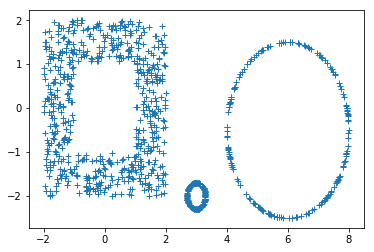

In [12]:
plt.plot(x[:,0],x[:,1],'+')

In [10]:
# Create GNG obj
gng = mdp.nodes.GrowingNeuralGasNode(max_nodes=75)

In [15]:
# Training
STEP = 500
for i in range(0,x.shape[0],STEP):
    gng.train(x[i:i+STEP])
    # [...] plotting instructions
gng.stop_training()

In [18]:
gng.get_nodes_position()

array([[ 6.60566178, -1.83824445],
       [ 1.49336606,  0.71687102],
       [ 3.29608648, -1.94714754],
       [ 1.43133751, -1.25051676],
       [ 4.38829583,  0.19895119],
       [-1.40652294, -0.92493717],
       [-1.39078282,  0.87091852],
       [ 7.30821621,  0.32528801],
       [ 0.07499737, -1.46382274],
       [-0.18857538,  1.50617441],
       [ 2.48868332, -1.76724265],
       [ 1.46235179, -0.26682287]])

In [20]:
gng.graph.connected_components()

[[<mdp.graph.GraphNode at 0x7f8173242630>,

In [33]:

import mdp
from PIL import Image, ImageDraw, ImageFont

#Generate data

#Fix the random number generator
mdp.numx_rand.seed(1266090063)

#Functions for generating shpes taken from the mdp tutorial
def uniform(min_, max_, dims):
    """Return a random number between min_ and max_ ."""
    return mdp.numx_rand.random(dims)*(max_-min_)+min_

def circumference_distr(center, radius, n):
    """Return n random points uniformly distributed on a circumference."""
    phi = uniform(0, 2*mdp.numx.pi, (n,1))
    x = radius*mdp.numx.cos(phi)+center[0]
    y = radius*mdp.numx.sin(phi)+center[1]
    return mdp.numx.concatenate((x,y), axis=1)

def circle_distr(center, radius, n):
    """Return n random points uniformly distributed on a circle."""
    phi = uniform(0, 2*mdp.numx.pi, (n,1))
    sqrt_r = mdp.numx.sqrt(uniform(0, radius*radius, (n,1)))
    x = sqrt_r*mdp.numx.cos(phi)+center[0]
    y = sqrt_r*mdp.numx.sin(phi)+center[1]
    return mdp.numx.concatenate((x,y), axis=1)

def rectangle_distr(center, w, h, n):
    """Return n random points uniformly distributed on a rectangle."""
    x = uniform(-w/2., w/2., (n,1))+center[0]
    y = uniform(-h/2., h/2., (n,1))+center[1]
    return mdp.numx.concatenate((x,y), axis=1)

N = 2000

cf1 = circumference_distr([7.5,6], 2, N//2)
cf2 = circumference_distr([5,1], 0.3, N//2)
cl1 = circle_distr([3.5,9], 0.5, N//2)
cl2 = circle_distr([3,2.5], 0.7, N)
r1 = rectangle_distr([5.5,3], 1, 1, N//2)
r2 = rectangle_distr([0.5,1], 1, 2, N)
r3 = rectangle_distr([1,7.5], 2, 1, N//2)
r4 = rectangle_distr([8,1], 2, 1, N//2)
x = mdp.numx.concatenate([cf1, cf2, cl1, cl2, r1,r2,r3,r4], axis=0)
x = mdp.numx.take(x,mdp.numx_rand.permutation(x.shape[0]), axis=0)

gng = mdp.nodes.GrowingNeuralGasNode(max_nodes=400)

#Create base image

#Convert floating point numbers to intergers for display in an image
def point_convert (x, y):
    """Convert point for gng to image point"""
    scale = 100.
    nx = int(x*scale)
    ny = int(y*scale)
    return (nx, ny)

baseim = Image.new('RGB', (1000, 1000), '#ffffff')
pix = baseim.load()

for point in x:
    impoint = point_convert(point[0], point[1])
    pix[impoint[0], impoint[1]] = (0,0,0)


#font = ImageFont.truetype("arial.ttf", 24)
#font = ImageFont.truetype("Verdana.ttf", 24,encoding="unic")

step = 20
total_points = x.shape[0]
fills = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff', '#00ffff', '#ff0088', '#ff8800', '#0088ff']
for i in range(0, total_points, step):
    im = baseim.copy()
    gng.train(x[i: i+step])
    objs = gng.graph.connected_components()
    n_obj = len(objs)
    
    draw = ImageDraw.Draw(im)
    
    for j,obj in enumerate(objs):
        for node in obj:
            fx, fy = node.data.pos
            nx, ny = point_convert(fx, fy)
            draw.ellipse((nx-5, ny-5, nx+5, ny+5), fill=fills[j % 8])
    
    
    #draw.text((700,900), "{0:.2%} complete".format(float(i+step)/float(total_points)), font=font, fill='#000000')
    #draw.text((700,930), "{0:d} connected components".format(n_obj), font=font, fill='#000000')
    del draw
    #im.save('training{0:d}.png'.format(i+step), 'PNG')

In [37]:
for j,obj in enumerate(gng.graph.connected_components()):
    for node in obj:
        fx, fy = node.data.pos
        nx, ny = point_convert(fx, fy)
        print('x=%d,y=%d (cluster#%d)'%(nx,ny,j))

x=69,y=720 (cluster#0)
x=70,y=748 (cluster#0)
x=54,y=774 (cluster#0)
x=17,y=767 (cluster#0)
x=106,y=733 (cluster#0)
x=138,y=729 (cluster#0)
x=170,y=732 (cluster#0)
x=181,y=774 (cluster#0)
x=143,y=776 (cluster#0)
x=20,y=737 (cluster#0)
x=97,y=778 (cluster#0)
x=16,y=43 (cluster#1)
x=53,y=18 (cluster#1)
x=69,y=39 (cluster#1)
x=87,y=88 (cluster#1)
x=56,y=101 (cluster#1)
x=54,y=138 (cluster#1)
x=85,y=147 (cluster#1)
x=69,y=160 (cluster#1)
x=87,y=185 (cluster#1)
x=44,y=185 (cluster#1)
x=15,y=181 (cluster#1)
x=23,y=140 (cluster#1)
x=20,y=113 (cluster#1)
x=87,y=119 (cluster#1)
x=59,y=64 (cluster#1)
x=38,y=69 (cluster#1)
x=87,y=15 (cluster#1)
x=24,y=15 (cluster#1)
x=19,y=81 (cluster#1)
x=877,y=69 (cluster#2)
x=880,y=128 (cluster#2)
x=855,y=123 (cluster#2)
x=817,y=137 (cluster#2)
x=773,y=118 (cluster#2)
x=741,y=108 (cluster#2)
x=722,y=98 (cluster#2)
x=679,y=96 (cluster#2)
x=738,y=68 (cluster#2)
x=754,y=89 (cluster#2)
x=785,y=70 (cluster#2)
x=718,y=139 (cluster#2)
x=829,y=75 (cluster#2)
x=887,y=7